In [2]:
# Imports

import pandas as pd
import seaborn as sns
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf
from IPython.display import Image

In [15]:
df_fly = pd.read_csv("mt_fly_strain.csv")
df_fly

df_filt = df_fly[df_fly["sex"] == "M"]

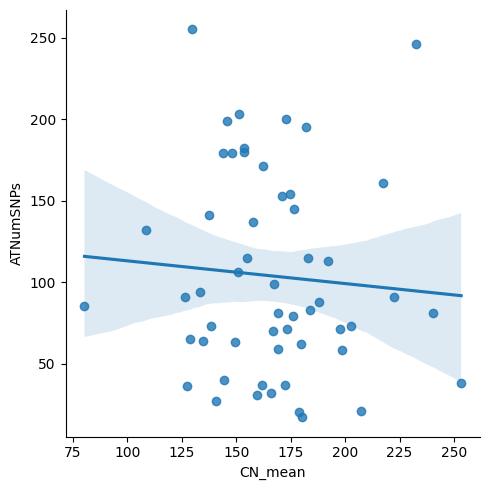

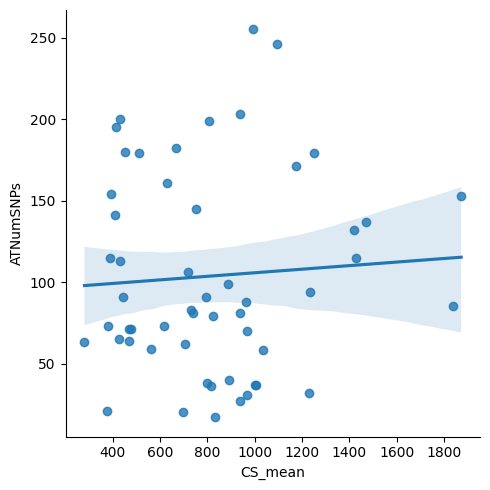

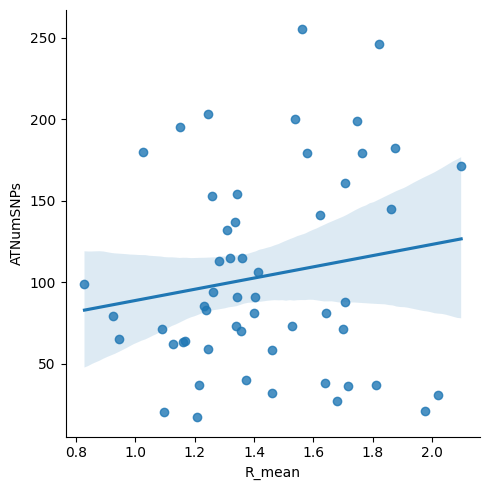

In [17]:
#Simple Linear Regression Plots

sns.lmplot(x="CN_mean", y="ATNumSNPs", data=df_filt)
sns.lmplot(x="CS_mean", y="ATNumSNPs", data=df_filt)
sns.lmplot(x="R_mean", y="ATNumSNPs", data=df_filt)

In [23]:
#Multiple Regression between # of SNPs and Phenotype measures

x = df_fly[['CS_mean','CN_mean', 'R_mean']]
y = df_fly['ATNumSNPs']

# adding a constant
x = sm.add_constant(x) 
 
SNPmodel = sm.OLS(y, x, missing='drop').fit()
predictions = SNPmodel.predict(x) 
 
print(SNPmodel.summary())

                            OLS Regression Results                            
Dep. Variable:              ATNumSNPs   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                    0.6735
Date:                Thu, 06 Apr 2023   Prob (F-statistic):              0.572
Time:                        22:29:49   Log-Likelihood:                -297.34
No. Observations:                  54   AIC:                             602.7
Df Residuals:                      50   BIC:                             610.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         75.5974     61.320      1.233      0.2

In [ ]:
Previous Cells:
    
#Categorical by Sex 

sns.catplot(data=df_fly, x="sex", y="CS_mean", kind="violin")
sns.catplot(data=df_fly, x="sex", y="CN_mean", kind="violin")
sns.catplot(data=df_fly, x="sex", y="R_mean", kind="violin")

#Categorical by Region

sns.catplot(data=df_fly, x="region", y="CS_mean", hue="region")
sns.catplot(data=df_fly, x="region", y="CN_mean", hue="region")
sns.catplot(data=df_fly, x="region", y="R_mean", hue="region")

#Categorical by Group

sns.catplot(data=df_fly, x="group", y="CS_mean", hue="group")
sns.catplot(data=df_fly, x="group", y="CN_mean", hue="group")
sns.catplot(data=df_fly, x="group", y="R_mean", hue="group")

#Simple Linear Regression I: CN vs CS

x = df_male["CS_mean"]
y = df_male["ATNumSNPs"]

x = sm.add_constant(x)

sim_line = sm.OLS(y, x, missing='drop')
result = sim_line.fit()

print(result.summary())